In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel("microbes.xlsx")
display(df)

,Family,Genus,Species,Gram Stain,Size,Shape,Metabolism,pH Range,Temp. Range,Salt Tolerance,...,Toxin Production,Toxin Type,Spore Formation,Pathogen,Antibiotic Produced,Industrial Use,Motile,Color or Pigment Production,Mortality Rate,Foodborne
0,Moraxellaceae,Acinetobacter,baumannii,Negative,1-2,Rod,Aerobe,6-8,30-37,Moderate,...,No,None,No,Yes,No,No,No,No,Moderate,No
1,Actinobacteria,Actinobacteria,thermophila,Positive,2-4,Rod,Aerobe,6-8,45-60,Moderate,...,No,None,No,No,No,Yes,No,No,Low,No
2,Actinomycetaceae,Actinopolyspora,propionica,Positive,2-4,Rod,Aerobe,6-8,25-37,High,...,No,None,No,No,Yes,Yes,No,No,Low,No
3,Alcaligenaceae,Alcaligenes,faecalis,Negative,1-2,Rod,Aerobe,6-8,30-37,Moderate,...,No,None,No,Yes,No,No,Yes,No,Low,No
4,Bacillaceae,Bacillus,anthracis,Positive,2-4,Rod,Aerobe,6-8,30-37,Low,...,Yes,Exotoxin,Yes,Yes,Yes,Yes,No,No,High,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Spirochaetaceae,Treponema,pallidum,Negative,6-15,Spiral,Microaerophilic,7-8,30-37,Low,...,No,None,No,Yes,No,No,Yes,No,High,No
70,Vibrionaceae,Vibrio,cholerae,Negative,2-4,Rod,Facultative Anaerobe,6-9,20-37,High,...,Yes,Exotoxin,No,Yes,No,No,Yes,No,High,Yes
71,Vibrionaceae,Vibrio,parahaemolyticus,Negative,2-4,Rod,Facultative Anaerobe,6-9,20-37,High,...,Yes,Exotoxin,No,Yes,No,No,Yes,No,Moderate,Yes
72,Vibrionaceae,Vibrio,vulnificus,Negative,2-4,Rod,Facultative Anaerobe,6-9,20-37,High,...,Yes,Exotoxin,No,Yes,No,No,Yes,No,High,Yes


In [4]:
# display(df.dtypes)

In [5]:
gram_stain = df.groupby("Gram Stain").size()
display(gram_stain)

Gram Stain
Negative    38
Positive    36
dtype: int64

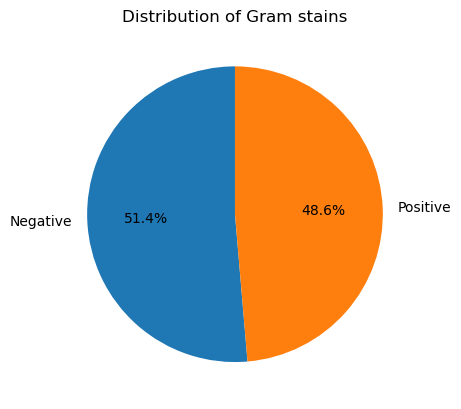

In [15]:
plt.pie(gram_stain, labels=gram_stain.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Gram stains")
plt.show()

In [7]:
genus_all = df.groupby("Genus").size()
multiple_genera = genus_all[genus_all > 1].sort_values(ascending=False)

print(f"There are {len(multiple_genera)} genera occuring more than once\n")
print(multiple_genera)

There are 11 genera occuring more than once

Genus
Bacillus           9
Streptococcus      5
Pseudomonas        4
Clostridium        3
Corynebacterium    3
Lactobacillus      3
Staphylococcus     3
Vibrio             3
Enterobacter       2
Neisseria          2
Salmonella         2
dtype: int64
